# Titanic Survival Project

# Project Description

# The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information 
about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived 
the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 



# Now Import the required libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


# Data Collection and preprocessing

In [48]:
#Now load the dataset
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
#To check the number of rows and columns in dataset we have
df.shape

(891, 12)

In [50]:
#If we want more information about the dataset than we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [51]:
#Checking the missing values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling the missing values

In [52]:
#drop the cabin column from dataframe
df.drop('Cabin',axis=1,inplace=True)

In [53]:
#Now in age column we have to repalce all the missing values with the mean of that column
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [54]:
df['Embarked'].mode()[0]

'S'

In [55]:
#Now in embarked column we have to replace all the missing values with the mode of that column
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [56]:
#Now again check for the missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [57]:
#for statistical summary for the dataset we have
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
#finding the number of people survived or not survived
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Data Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

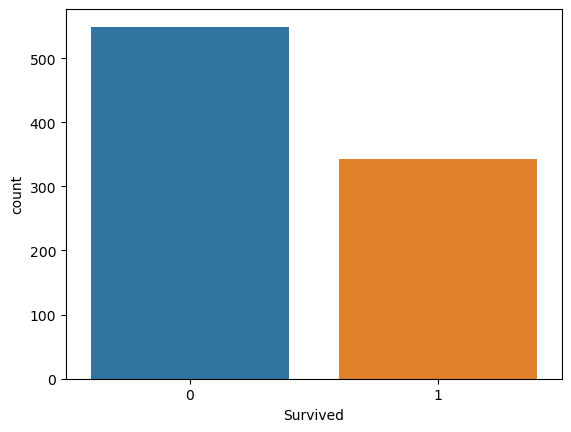

In [59]:
#Make a countplot for the survived column
import warnings
warnings.filterwarnings('ignore')
sns.countplot('Survived',data=df)

In [60]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

From .value_counts function we can see the no of male and female passenger on the ship.
We can also plot a count plot to check the male and female 

<AxesSubplot:xlabel='Sex', ylabel='count'>

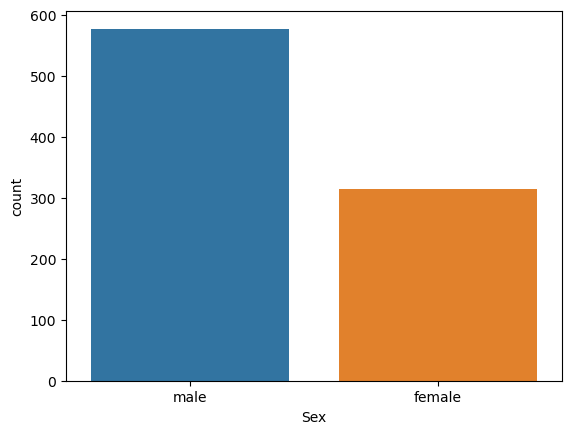

In [61]:
#Now we have to check how many are male and female passenger on the ship, we can do that by using countplot
sns.countplot('Sex',data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

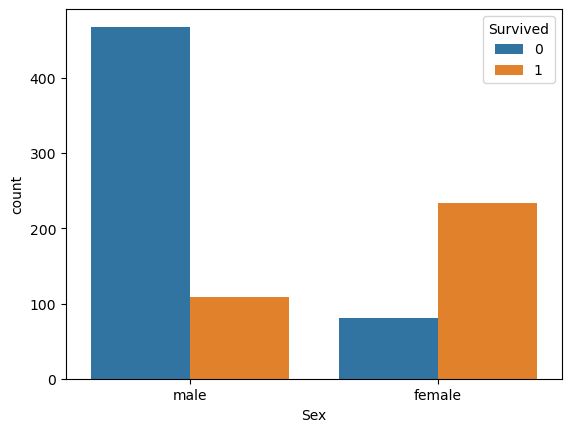

In [62]:
#Now check the number of survivors based on gender
sns.countplot('Sex',hue='Survived',data=df)

Encoding the categorical columns

In [63]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [64]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [65]:
#Converting the categorical columns
df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [66]:
#Now checking the data is converted or not
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Now in sex column for male we have o and for female we have 1
Like in embarked we have 0,1,2 for s,c,q respectively

In [67]:
#The passengerid,name or ticket column are of not much important,so we have to remove all the three columns
df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [68]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


Separating the target and feature variables

In [69]:
x=df.iloc[:,1:]

In [70]:
y=df.iloc[:,0]

In [71]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [72]:
#Now check the shape of x
x.shape

(891, 7)

In [73]:
#Now check the shape of y
y.shape

(891,)

In [74]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Splitting the data into training and testing data

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)

In [76]:
x_train.shape

(712, 7)

In [77]:
x_test.shape

(179, 7)

In [78]:
y_train.shape

(712,)

In [79]:
y_test.shape

(179,)

Model Training

Logistic Regression

In [80]:
Lg=LogisticRegression()

In [81]:
Lg.fit(x_train,y_train)

LogisticRegression()

In [82]:
pred=Lg.predict(x_test)

In [83]:
print(pred)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [84]:
accuracy_score(y_test,pred)

0.7821229050279329

In [85]:
print(confusion_matrix(y_test,pred))

[[91  9]
 [30 49]]


In [86]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.62      0.72        79

    accuracy                           0.78       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



# Evaluating with the help of Gaussian Multinomial Model

In [87]:
from sklearn.naive_bayes import GaussianNB

In [90]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7597765363128491
[[86 14]
 [29 50]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       100
           1       0.78      0.63      0.70        79

    accuracy                           0.76       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



Check that the person is survived or not

In [100]:
t=np.array([3,0,22.0,1,0,7.2500,0])

In [101]:
t.shape

(7,)

In [104]:
t1=t.reshape(1,7)


In [105]:
#Again checking the shape
t1.shape

(1, 7)

In [106]:
gnb.predict(t1)

array([0], dtype=int64)

So,the person is not survived here
In actual data from where we take that also the person not survived
So GaussianNb accurately predicted the results
